# Расчетное задание 1

## Идентификация сообщений, передаваемых по зашумленному каналу связи

### Часть 1. Последовательная передача одинаковых сообщений

#### 1.1. Определение переданного сообщения

##### Исходный алфавит

In [1]:
alphabet = {}
with open('alphabet.txt', encoding='utf8') as f:
    content = f.readlines()
    content = [x.rstrip().split('\t') for x in content]
    for pair in content:
        alphabet[pair[0]] = pair[1]
    print(alphabet)


{'з': '0110011', 'э': '1001001', '7': '0000111', 'Б': '0001011', 'Ё': '0010000', 'З': '0010010', '5': '0000101', 'Е': '0001111', 'У': '0011110', 'ш': '1000100', 'И': '0010011', 'Г': '0001101', 'Ц': '0100001', 'Х': '0100000', 'Д': '0001110', 'я': '1001011', 'д': '0101111', 'Ы': '0100110', 'Ч': '0100010', 'Р': '0011011', 'Ъ': '0100111', '!': '1001110', '9': '0001001', 'Ю': '0101001', 'й': '0110101', 'Н': '0011000', 'г': '0101110', 'ц': '1000010', 'р': '0111100', 'Ш': '0100011', 'Ф': '0011111', 'ю': '1001010', 'О': '0011001', 'л': '0110111', '-': '1010001', 'ы': '1000111', 'м': '0111000', 'ф': '1000000', '.': '1001100', 'у': '0111111', 'н': '0111001', '№': '1010011', 'с': '0111101', 'к': '0110110', 'щ': '1000101', 'ё': '0110001', 'Ж': '0010001', 'Щ': '0100100', 'т': '0111110', 'Т': '0011101', 'о': '0111010', 'Я': '0101010', '4': '0000100', 'В': '0001100', '2': '0000010', 'б': '0101100', 'Ь': '0100101', 'Л': '0010110', '?': '1010000', 'е': '0110000', '8': '0001000', 'п': '0111011', ',': '1

In [2]:
def get_char(code: str):
    for key, value in alphabet.items():
        if value == code:
            return key


Словарь априорных вероятностей:

In [3]:
priori = alphabet.copy()
n = len(alphabet)
p = 1 / n
for key, value in priori.items():
    priori[key] = p


Функция, находящая максимальное значение в словаре

In [4]:
def find_max(d: dict):
    return max(d, key=d.get)


#### Входные данные

In [5]:
with open('input.txt', encoding='utf8') as f:
    content = f.readlines()


Колличество букв в каждом сообщении равно $s$:

In [6]:
s = int(content[0].split(': ')[1])
print('s = {s}'.format(s=s))


s = 222


Вероятность искажения каждого отдельного символа (бита) равна $q$, вероятность правильной передачи $p = 1 - q$:

In [7]:
q = float(content[2].split(': ')[1])
p = 1 - q
print('p = {p}, q = {q}'.format(p=p, q=q))


p = 0.832, q = 0.168


Колличествно передач равно $m$:

In [8]:
m = int(content[3].split(': ')[1])
print('m = {m}'.format(m=m))


m = 18


Функция вероятности того, что $code1$ и $code2$ - это одно и то же сообщение 

In [9]:
def find_probability(code1, code2):
    assert len(code1) == len(code2)
    prob = 1
    for i in range(len(code1)):
        prob = prob * (p if code1[i] == code2[i] else q)
    return prob


Функция расчета апостариорной вероятности при получении кода $code$:

In [10]:
def find_prob_message(dict_char: dict, cond_probs: dict):
    total = 0
    for char in cond_probs.keys():
        total = total + cond_probs[char] * dict_char[char]
    return total


def posterior_probabilities(dict_char: dict, code: str):
    cond_probs = alphabet.copy()
    for char in cond_probs.keys():
        cond_probs[char] = find_probability(alphabet[char], code)
    
    for char in dict_char.keys():
        new_prob = cond_probs[char] * dict_char[char] / find_prob_message(dict_char, cond_probs)
        dict_char[char] = new_prob

In [11]:
def posterior_probabilities(dict_char: dict, code: str):
    cond_probs = alphabet.copy()
    for char in cond_probs.keys():
        cond_probs[char] = find_probability(alphabet[char], code)

    total = 0
    for char in cond_probs.keys():
        total = total + cond_probs[char] * dict_char[char]

    for char in dict_char.keys():
        new_prob = cond_probs[char] * dict_char[char] / total
        dict_char[char] = new_prob


Функция, возврщающая отсортированный по двоичному коду алфавит.

In [12]:
def get_sorted_keys():
    sorted_values = sorted(alphabet.values())
    sorted_keys = []
    for value in sorted_values:
        sorted_keys.append(get_char(value))
    return sorted_keys


#### Все символы равновероятны

In [13]:
messages = []

for i in range(m):
    codes = content[i + 4].split(': ')[1].rstrip().split(' ')
    messages.append(codes)


In [14]:
import math

def entropy(d: dict):
    res = 0
    for key, value in d.items():
        res = res + value * math.log2(value)
    return -res


In [15]:
# TODO

def cond_entropy(d: dict, code: str):
    res = 0
    for key, value in d.items():
        res = res + value * math.log2(value)
    return -res


In [16]:
def info(dict_char: dict, code: str):
    summ = 0
    for char in dict_char.keys():
        summ = summ + find_probability(alphabet[char], code) * math.log2(dict_char[char])
    return -summ - cond_entropy(dict_char, code)


In [17]:
chars = []  # вероятности появления каждого j-ого символа после i-ого сообщения
entropies = []  # значения энтропий каждого j-ого символа после i-ого сообщения
infos = []  # значения кол-ва информации об j-ом символе после i-ого сообщения

char_array = []  # инициализируем априорными вероятностями
for j in range(s):
    char = priori.copy()
    char_array.append(char)
chars.append(char_array)

for i in range(m):  # для каждого сообщения

    entropies_array = []
    info_array = []

    for j in range(s):  # для каждой буквы в сообщении
        entropies_array.append(entropy(chars[i][j]))
        info_array.append(info(chars[i][j], messages[i][j]))
        posterior_probabilities(chars[i][j], messages[i][j])

    entropies.append(entropies_array)
    infos.append(info_array)

    if i != m - 1:  # априорное для следующего = постериорное для текущего
        char_array = []
        for j in range(s):
            char = chars[i][j].copy()
            char_array.append(char)
        chars.append(char_array)


In [18]:
for i in range(m):
    print(i + 1, end=': ')
    for j in range(s):
        max_char = find_max(chars[i][j])
        print(max_char, end='')
    print()


1: 8:ЛДьэчимв 4зГЩрТюизьдпПзж:_235ц1Ё Т вжШНН_пк ,кБНпыпЯлдчт_зая(т пЯ гХНоиб(вевЯчтЮосйиёцуЗНитЩтисШ .ирелЬаМр3чЦТзШЬо,тча. Ял!ЛФтжгЯ(ЯоюсебмеЯТ! про.йшат6(ЦУЙкРммвкеифКо ззЬа:и(й?ннелЯр.УА№Ч(рюсяЁрн7х кядя-_2!кА(и3елаю эдЗ.
2: Д,(!6эчкмв 4пдХмчьйз4гРУЗзЕ_З7Ью9Зь:ЛвгШмУ_нтывйРма!пАзу№У_зЯ!(тьпг№геммир(вХдояУмпйлеЖцуЛЗег4крсЦ )ймек7п6ТБяХТЖаГЯ,мцБш гзяЛ,ЫзДо(ппУрёбрЁгся прПрёшатД(фДЗкпННбтейшйн(зпЬаяи(лЗРуеуЧршУ3яЦЛрЯсэетнМх еадэЮеБ!Уя(рБЧлаю(эгП.
3: !, ДьэчЛмв 4ауЩм, изшгттпз:_23Ьъ5Зь, вЧШмжжно вкорпьпЯлучт жачет по№геориЩьвжрЯятнойтеЖыуЛЗеЫЩтисЮ (имикла рБяЦсзавовича. Азя ,тоДо потрертегс: пробе4ать хти птмвтейфй? зРдпчи к(суелЯть!2-ШЛрЯсчетн7х жадэния. ю(сБжлаю ,дП.
4: гЕ(Д!ячЛов 4адЩм: ил(гттпз:_Ч35ъ4_Д, вЧШмжжсо влоро пЭлу№у(жачетьпг теорЩЩ(ЮероятнойуеЖ уЛЗХкЩтина )ймикйа СБяХсИавовица. Дзя_этого потребуетсяьпрпгешат6(хти провтейфй? зБЫачи к(суелЯть!2-ШЛрЯсчетныщ задЮния. я(с3елаю(.гПВ
5: г, ДьячЛов 4ауим, из гттпз: 23Ь81_6, вжамжжно вкоро получу зачет по теорииьЮжроятнойтеК у Пик

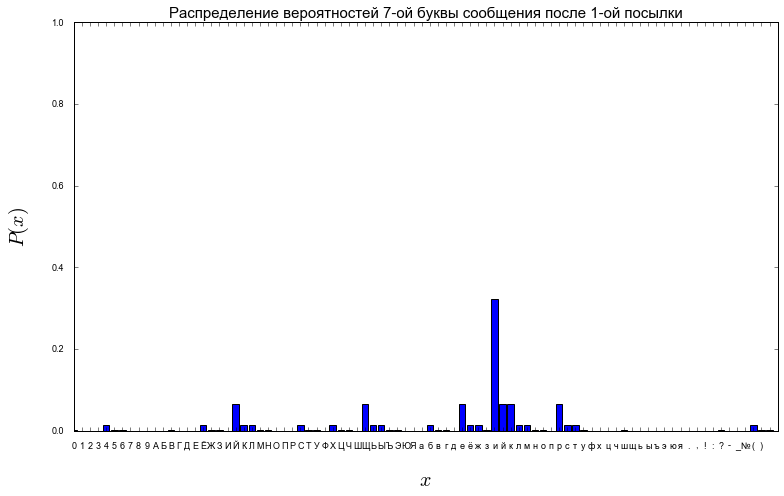

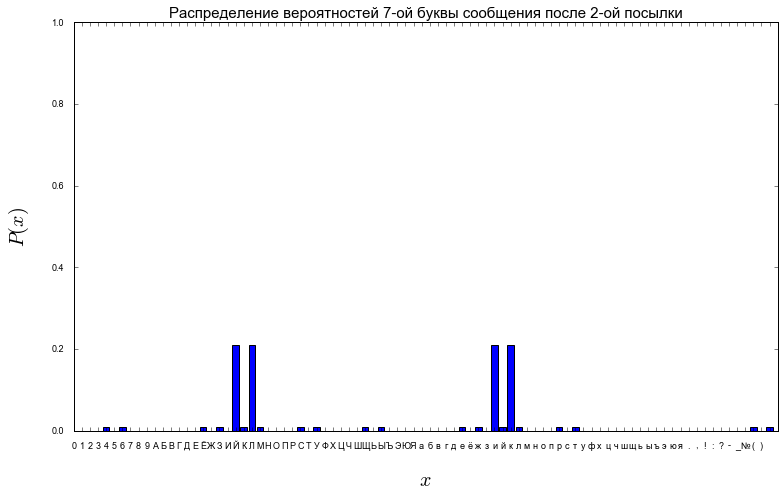

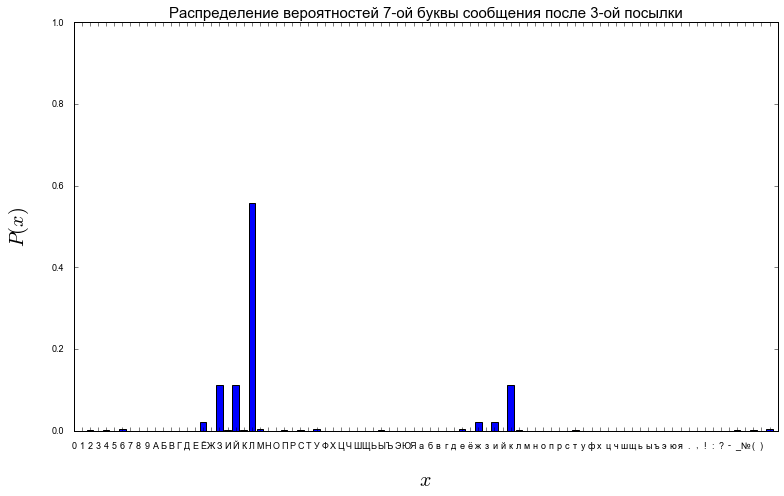

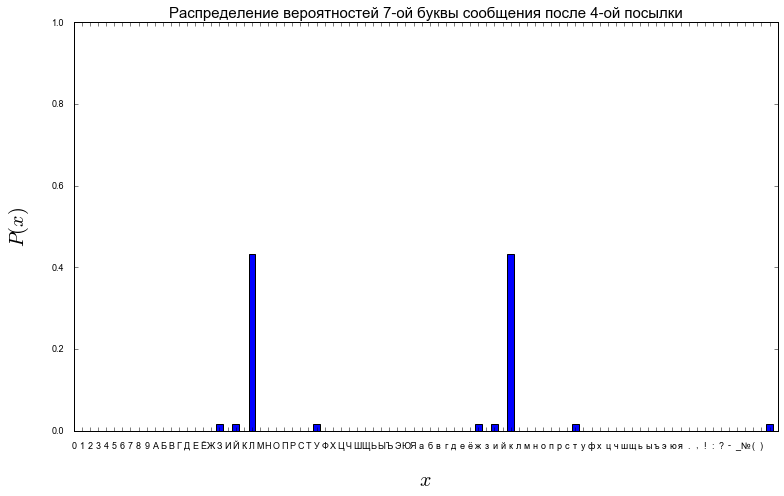

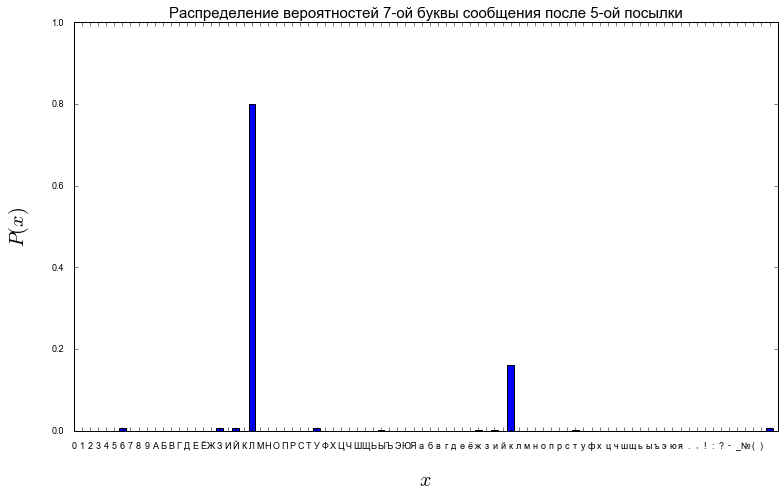

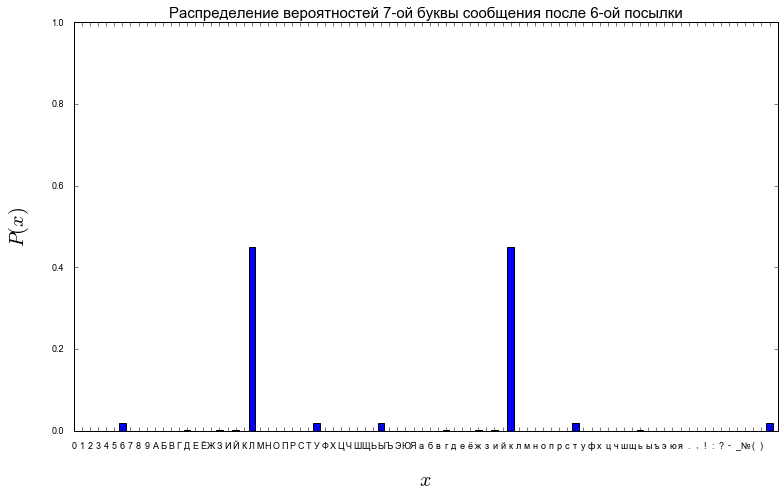

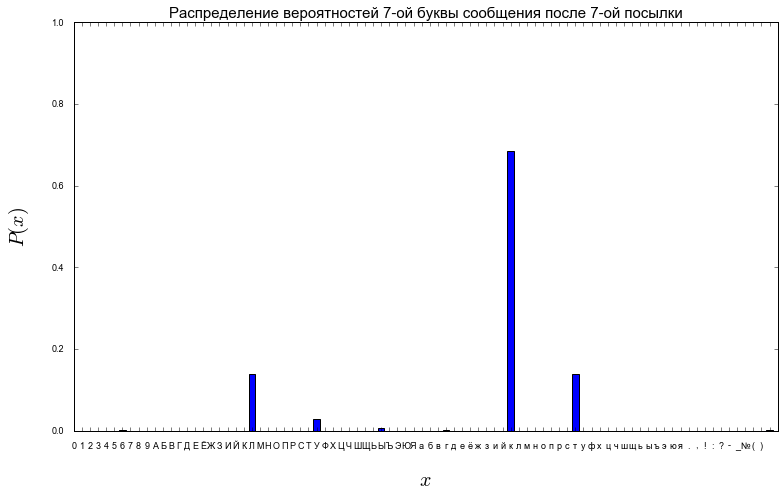

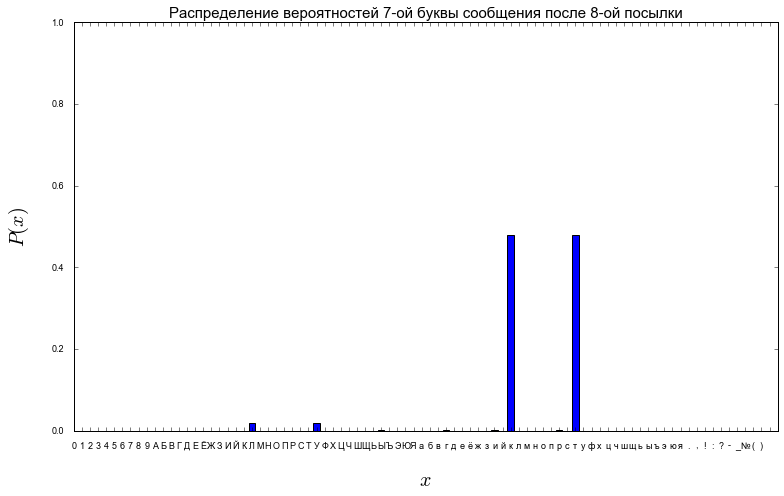

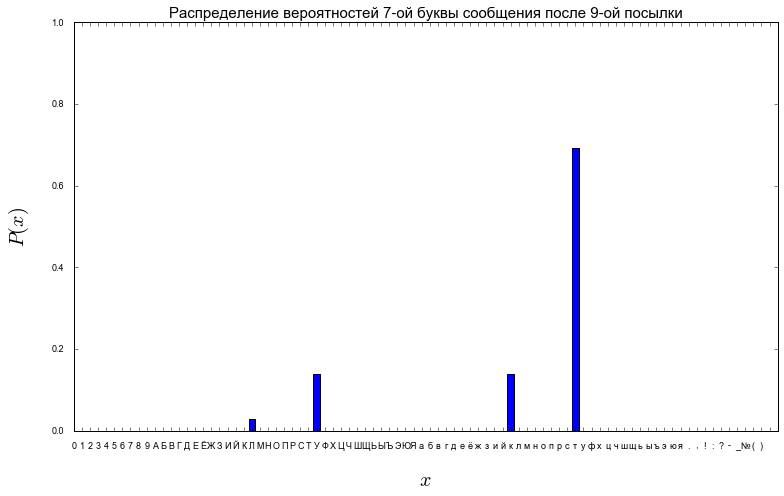

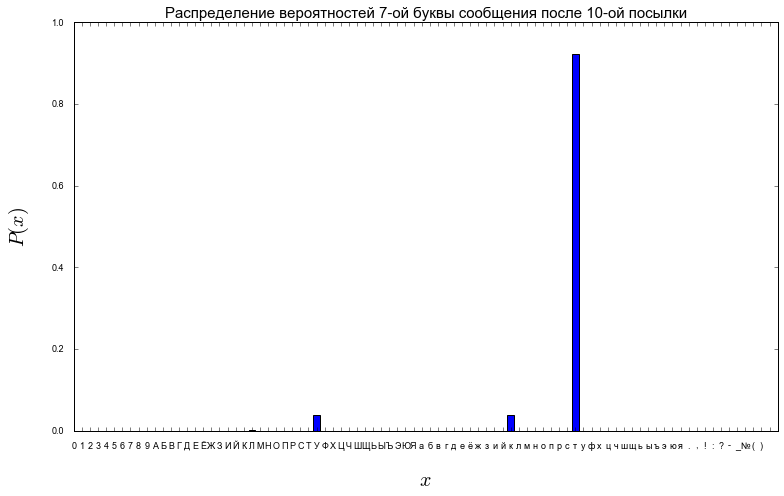

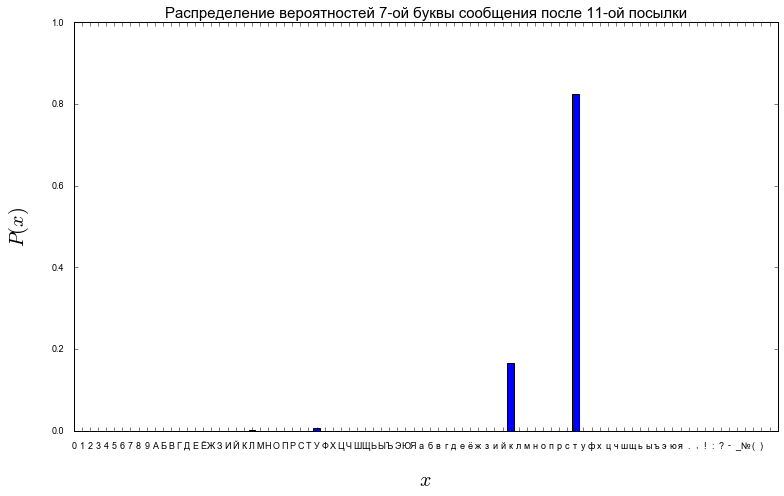

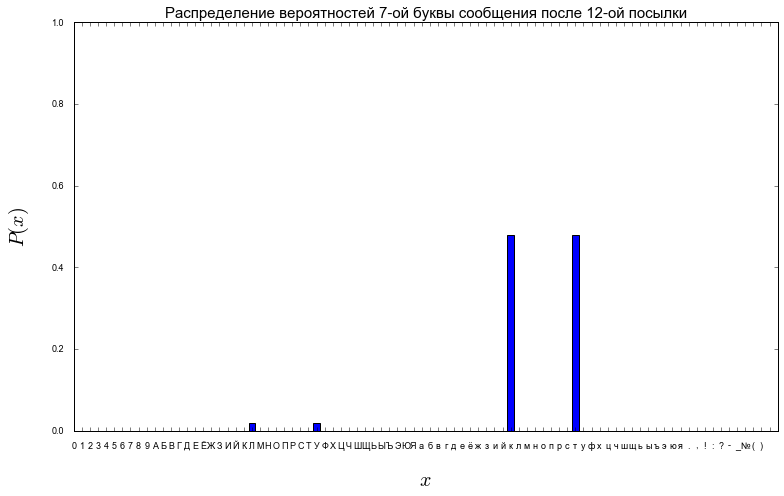

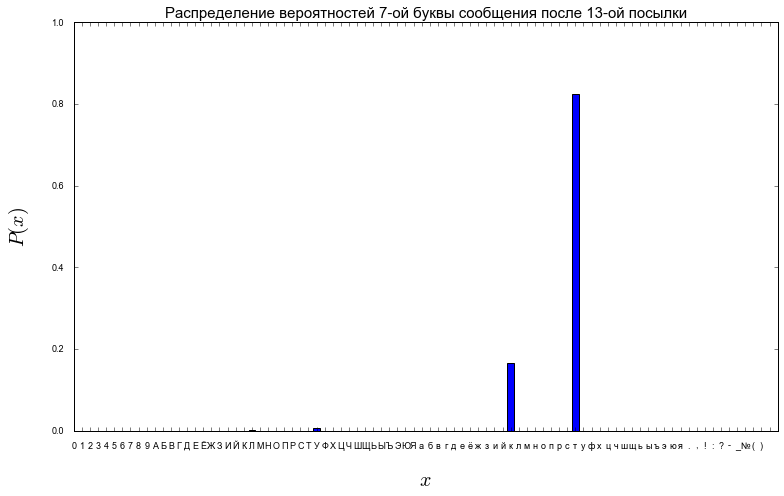

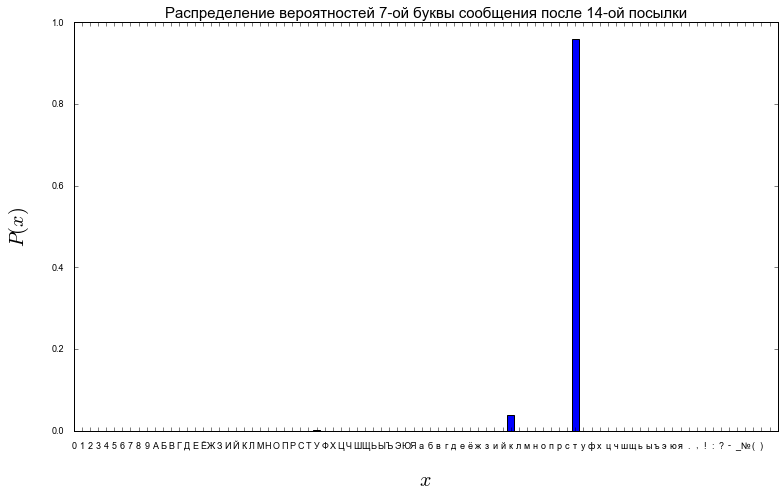

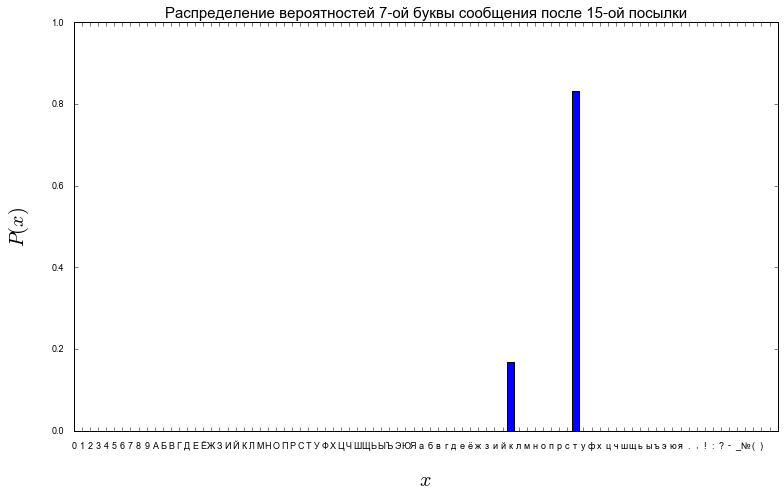

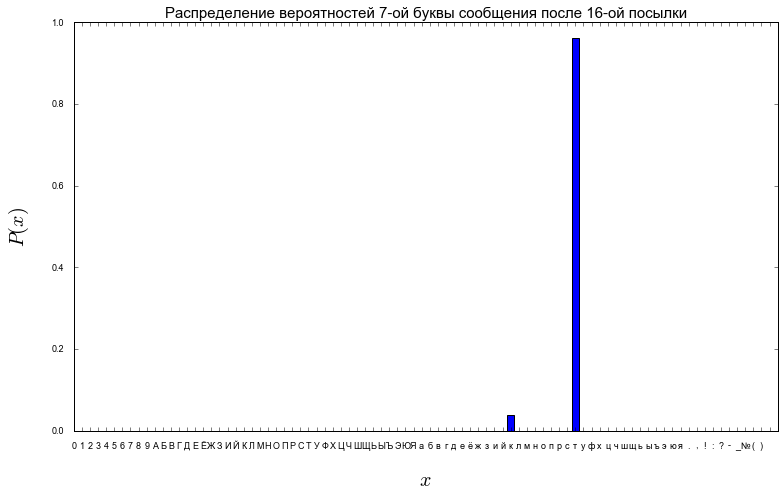

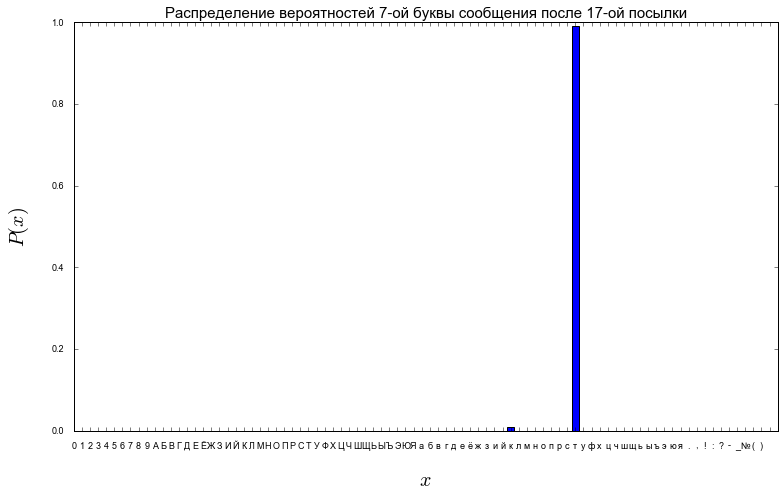

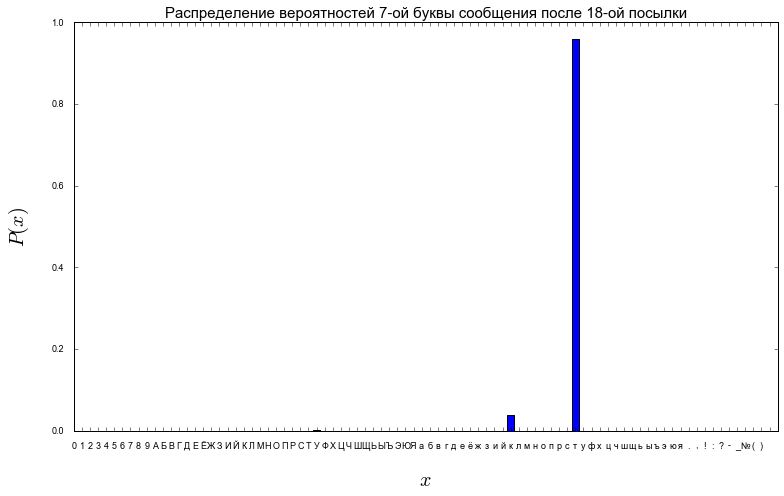

In [19]:
import matplotlib.pyplot as plt
from matplotlib import rc

font = {'family': 'Arial', 'weight': 'normal'}
rc('font', **font)

for i in range(m):  # для каждого сообщения
    char_num = 7
    curr = chars[i][char_num]

    sorted_keys = get_sorted_keys()
    sorted_values = []
    for key in sorted_keys:
        sorted_values.append(curr[key])

    fig = plt.figure(figsize=(11, 7))
    plt.bar(range(len(alphabet)), sorted_values, align='center')
    plt.xticks(range(len(curr)), sorted_keys)
    plt.xlabel('$x$', fontsize=20, labelpad=20)
    plt.ylabel('$P(x)$', fontsize=20, labelpad=20)
    plt.tick_params(labelsize=9, pad=10)
    plt.title('Распределение вероятностей {0}-ой буквы сообщения после {1}-ой посылки'.format(char_num, i + 1), fontsize=15)
    plt.tight_layout()
    plt.xlim([0, len(curr)])
    plt.ylim([0, 1])
    plt.tight_layout()
    # plt.savefig('./pics/uniform{i}.png'.format(i=i+1))
    plt.show()
    plt.close(fig)


#### Вероятности задаются исходя из частоты встречания букв в русском языке

In [20]:
with open('frequencies.txt', encoding='utf8') as f:
    content = f.readlines()
    frequncies = {}
    content = [x.rstrip().split('\t') for x in content] 
    for pair in content:
        frequncies[pair[0]] = float(pair[1])
        
print(frequncies)

{'з': 1.81, 'э': 0.17, 'й': 1.31, 'т': 6.3, 'г': 1.41, 'о': 9.28, 'ц': 0.52, 'р': 5.53, 'ь': 1.9, 'щ': 0.49, 'ю': 1.03, 'м': 3.29, 'б': 1.51, 'х': 0.92, 'ы': 2.11, 'е': 8.1, 'ф': 0.4, 'я': 2.22, 'д': 2.56, 'у': 2.9, 'п': 3.35, 'л': 4.32, 'ш': 0.77, 'н': 6.35, 'ъ': 0.04, 'с': 5.45, 'к': 3.47, 'в': 4.19, 'ё': 0.14, 'а': 8.66, 'и': 7.45, 'ж': 0.78, 'ч': 1.27}


In [21]:
def get_frequency(char: str):
    assert len(char) == 1
    char = char.lower()
    if char in frequncies.keys():
        return len(frequncies) * priori[char] * frequncies[char] / sum(frequncies.values())
    else:
        return priori[char]


In [22]:
priori_weight = priori.copy()
for key in priori_weight.keys():
    priori_weight[key] = get_frequency(key)
    
print(priori_weight)
print('Sum = ' + str(sum(priori_weight.values())))

{'з': 0.00686551724137931, 'э': 0.0006448275862068966, '7': 0.011494252873563218, 'Б': 0.005727586206896551, 'Ё': 0.0005310344827586207, 'З': 0.00686551724137931, '5': 0.011494252873563218, 'Е': 0.030724137931034477, 'У': 0.011, 'ш': 0.002920689655172414, 'И': 0.02825862068965517, 'Г': 0.005348275862068965, 'Ц': 0.0019724137931034485, 'Х': 0.0034896551724137932, 'Д': 0.009710344827586207, 'я': 0.008420689655172415, 'д': 0.009710344827586207, 'л': 0.016386206896551726, 'Ч': 0.004817241379310344, 'Р': 0.020975862068965515, 'Ъ': 0.00015172413793103449, '!': 0.011494252873563218, '9': 0.011494252873563218, 'Ю': 0.003906896551724138, 'й': 0.00496896551724138, 'Н': 0.02408620689655172, 'г': 0.005348275862068965, 'ц': 0.0019724137931034485, 'р': 0.020975862068965515, 'Ш': 0.002920689655172414, 'Ф': 0.0015172413793103448, 'ю': 0.003906896551724138, 'О': 0.035199999999999995, 'м': 0.012479310344827585, '-': 0.011494252873563218, 'ы': 0.008003448275862069, 'ф': 0.0015172413793103448, '.': 0.0114

In [23]:
chars_weight = []  # вероятности появления каждого j-ого символа после i-ого сообщения
entropies_weight = []  # значения энтропий каждого j-ого символа после i-ого сообщения
infos_weight = []  # значения кол-ва информации об j-ом символе после i-ого сообщения

char_array = []  # инициализируем априорными вероятностями
for j in range(s):
    char = priori_weight.copy()
    char_array.append(char)
chars_weight.append(char_array)

for i in range(m):  # для каждого сообщения

    entropies_array = []
    info_array = []

    for j in range(s):  # для каждой буквы в сообщении
        entropies_array.append(entropy(chars_weight[i][j]))
        info_array.append(info(chars_weight[i][j], messages[i][j]))
        posterior_probabilities(chars_weight[i][j], messages[i][j])

    entropies_weight.append(entropies_array)
    infos_weight.append(info_array)

    if i != m - 1:  # априорное для следующего = постериорное для текущего
        char_array = []
        for j in range(s):
            char = chars_weight[i][j].copy()
            char_array.append(char)
        chars_weight.append(char_array)

In [24]:
for i in range(m):
    print(i + 1, end=': ')
    for j in range(s):
        max_char = find_max(chars_weight[i][j])
        print(max_char, end='')
    print()

1: 8:ЛДь9чимв 4зЕирТПизьдпПзо:_23521е Т воаНН_пк вкаНпыпЯлдчт_заяит пЯ геНоиб(вевЯчтаосиие2уЗНититиса СирелЬаМр3ч1ТзаЬо,тча. Ял!Л:тогЯ(ЯоПсебмеЯТ! проСииат6(хУикРммвкеи?Ко ззЬа:и(и?ннелЯр.!А№Ч(рЯсяерн7х када-_2!кА(и3елаА 9дЗ.
2: А,ЛА6э3инв ВаЕХр:_изЛдОоозЕ_275А5? ,ЛвоШНо_но виоНаАпАлл№т_за!ет!по№теооии вето№тноТЕеЖИуЛНетиоиса )иреллаЛТ3:еТИаво,очаВ Ал!Л,тоДо ооореиоеоТ! проре4ат! -текОоовтеи.ио(зова:и иеОоелЯт!!А-еЛрЯТяетнИх еадаееА!та и3елаю(,тП,
3: !, Дь,чЛмв 4ауим, изшгттпз:_23Ь.5Зь, вЧаможно вкорпьпЯлучт еачет по№георииьверЯятнойтеЖМуЛЗеЫитиса (имикла рЕяЦсзавовича. Азя ,тоДо потрертегс: пробе4ать хти птмвтеифие зРдпчи к(суелЯть!2-ШЛрЯсчетн7х оадания. Я(саелаю ,дП.
4: гЕ(Д!ячЛов Вауим: ил(Ыттпз:_23585_!, вЧамжжно влоро полу№т(зачет по теории вероятностеК уЛПекЩтина Кирилла ряяХсИавовича. АляЛ,тоДо потреитетс! проте4ат6 хти птостейшие задачи и(сселАть!2-3ЛраТчетн7х завания. а саелаю(.тПВ
5: г, ДьячЛов 4ауим, из гттпз: 23Ь81_6, воаможно вкоро получу зачет по теорииьЮероятнойтеК у Пик

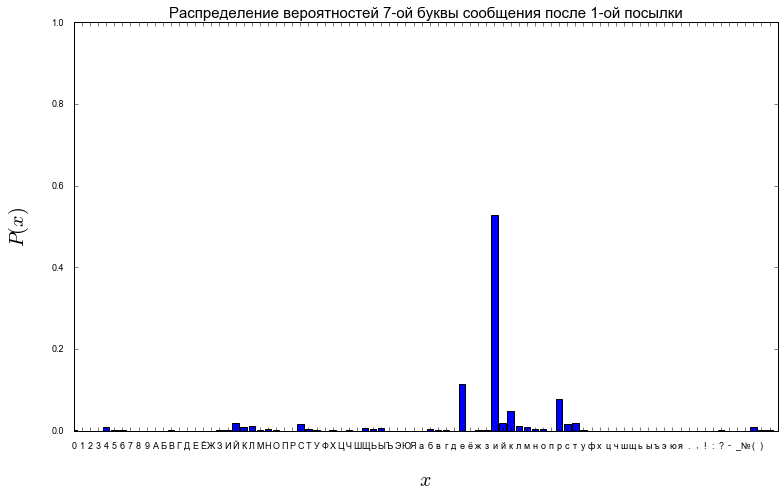

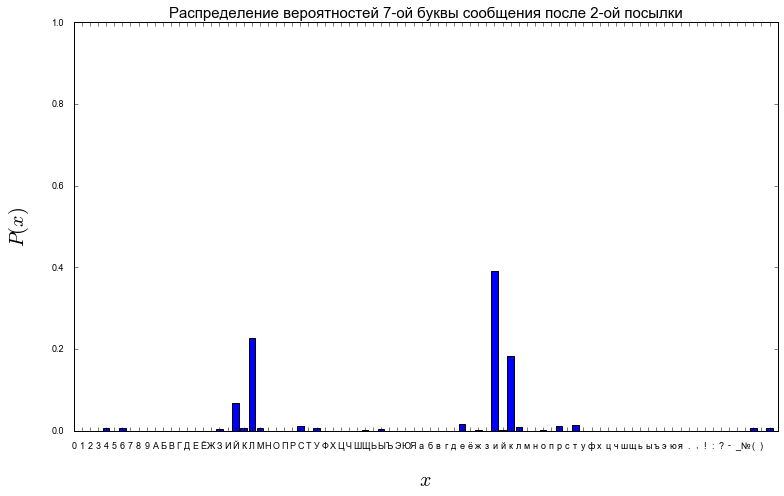

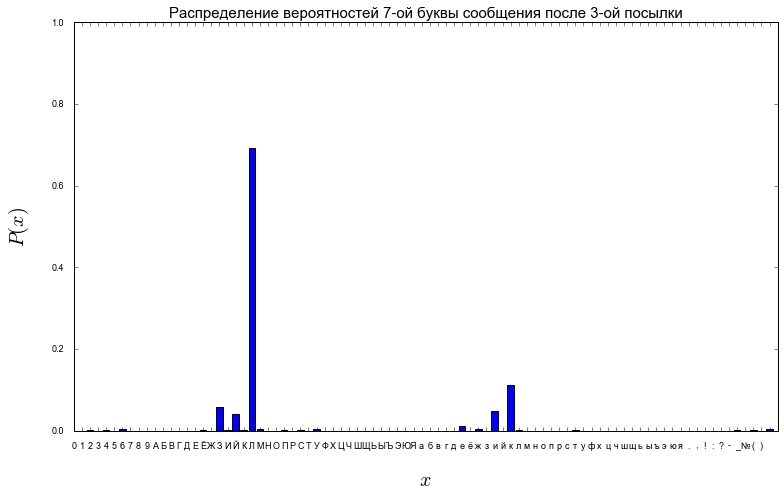

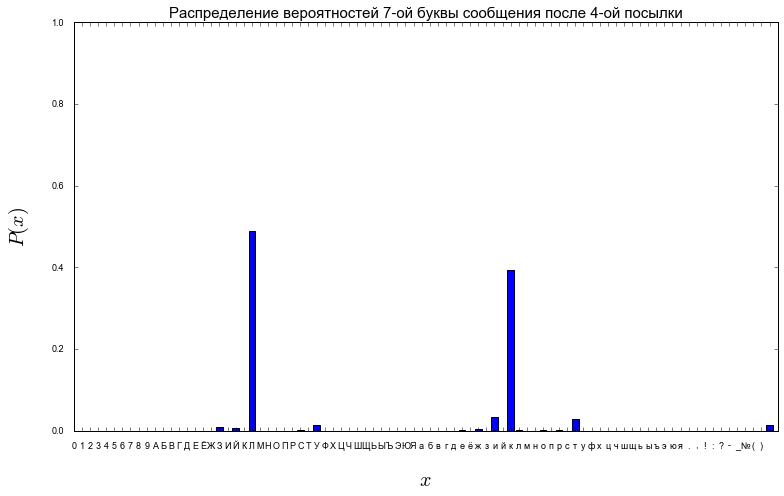

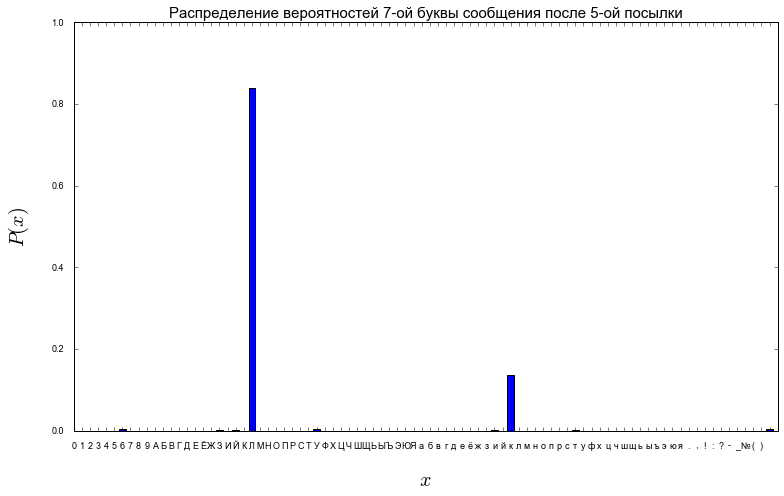

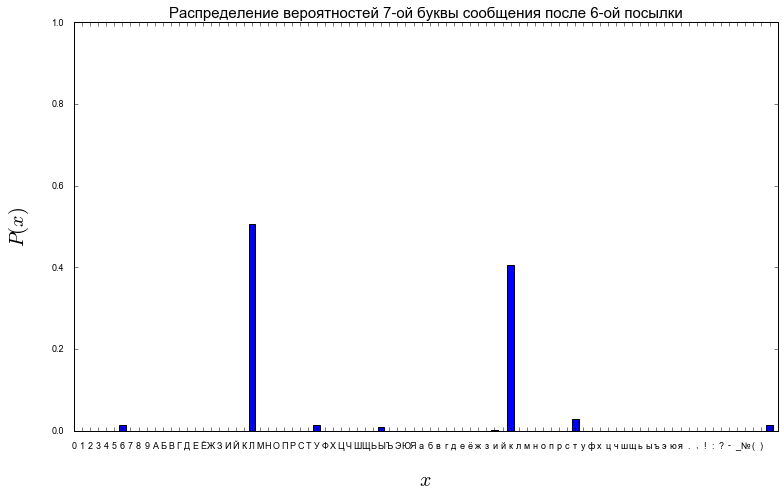

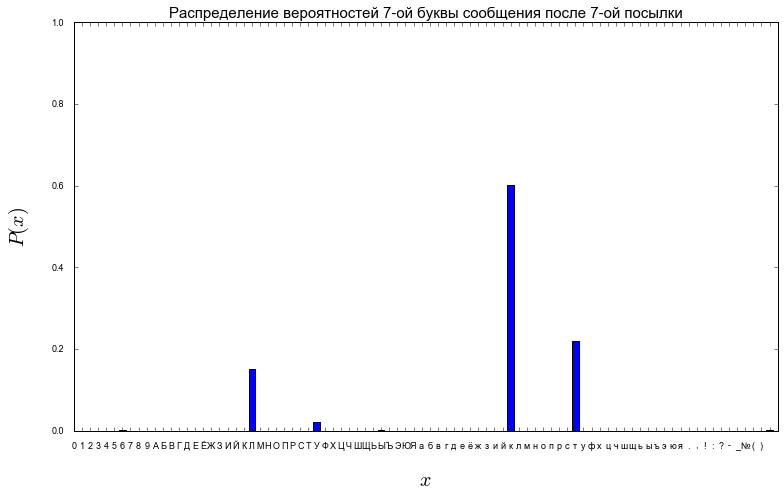

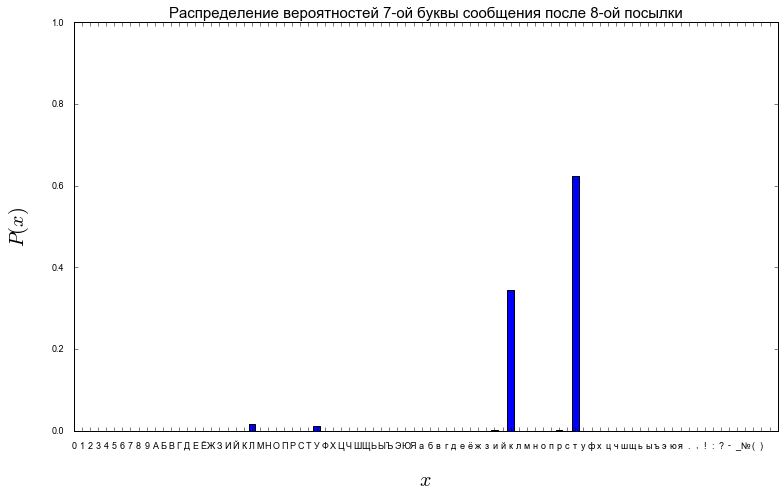

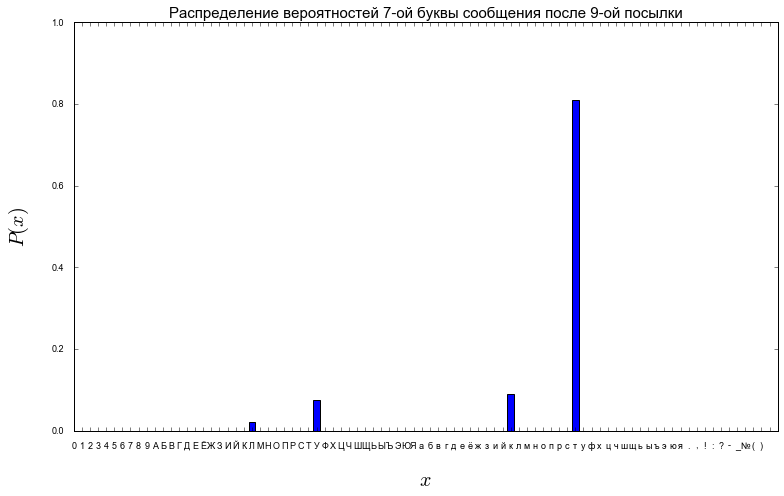

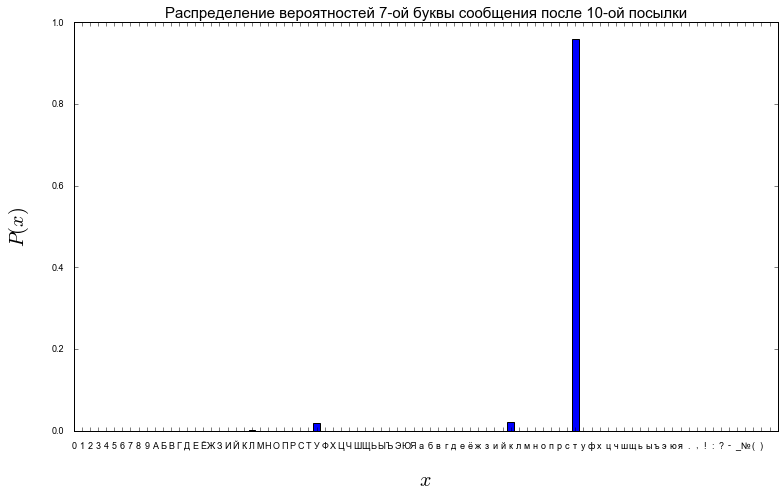

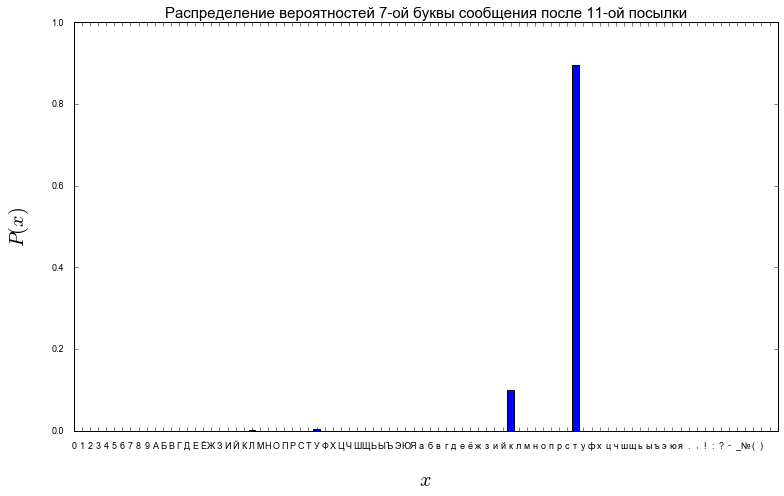

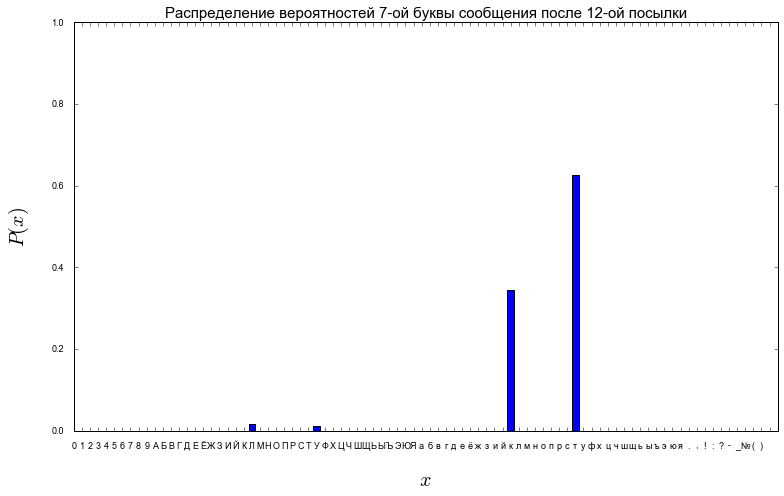

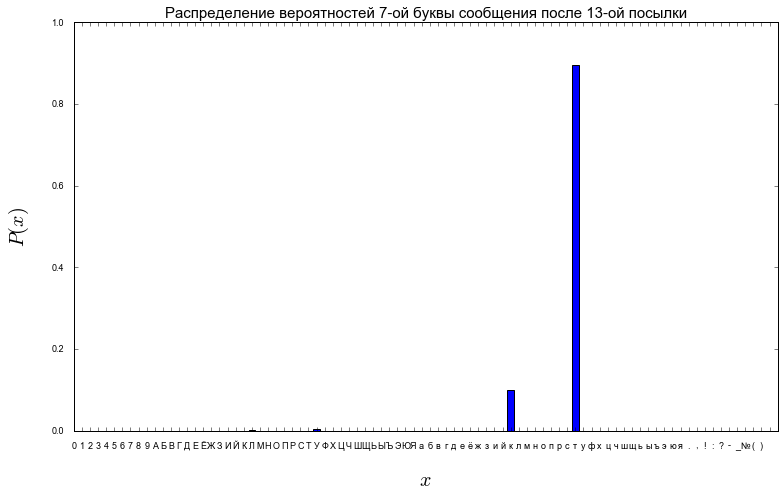

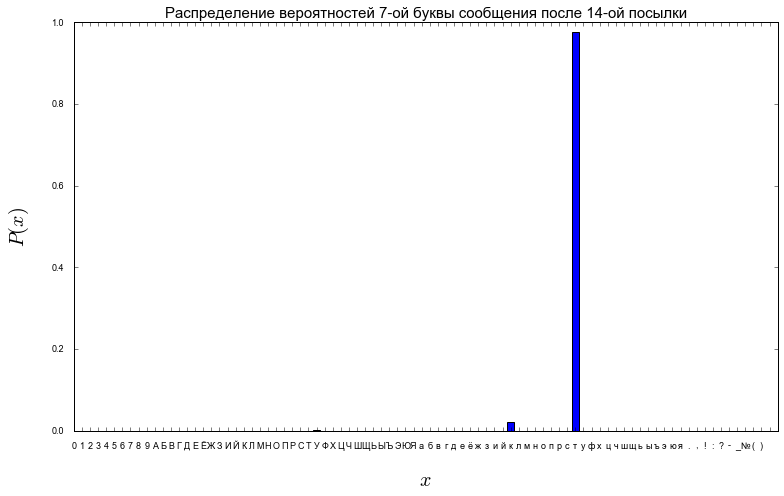

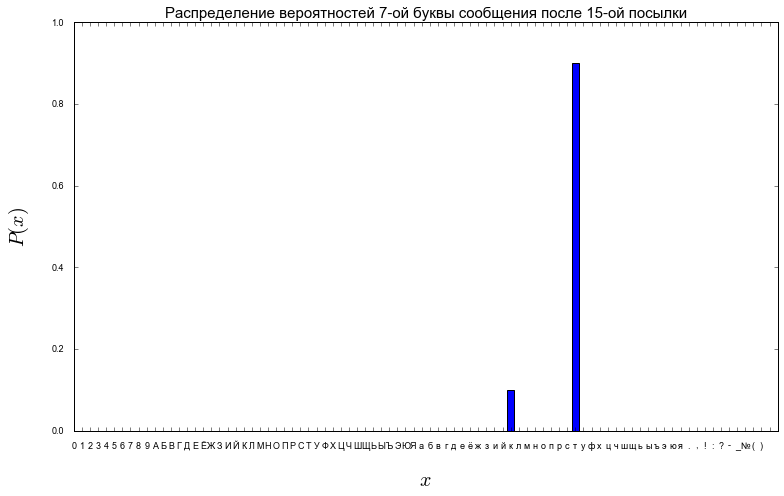

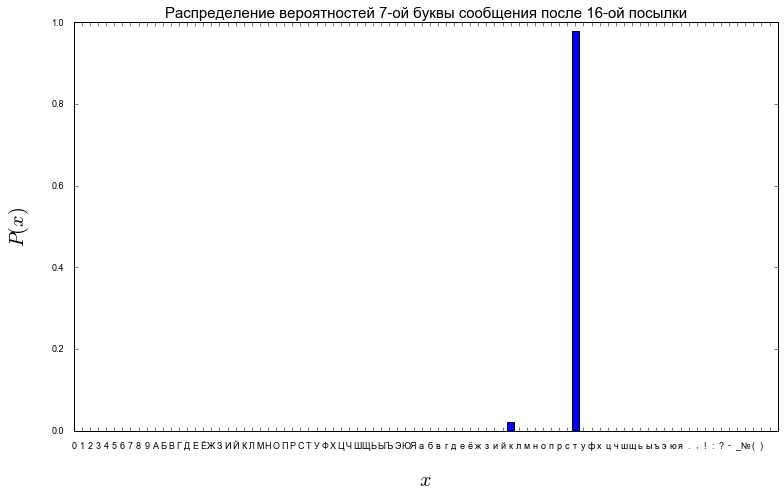

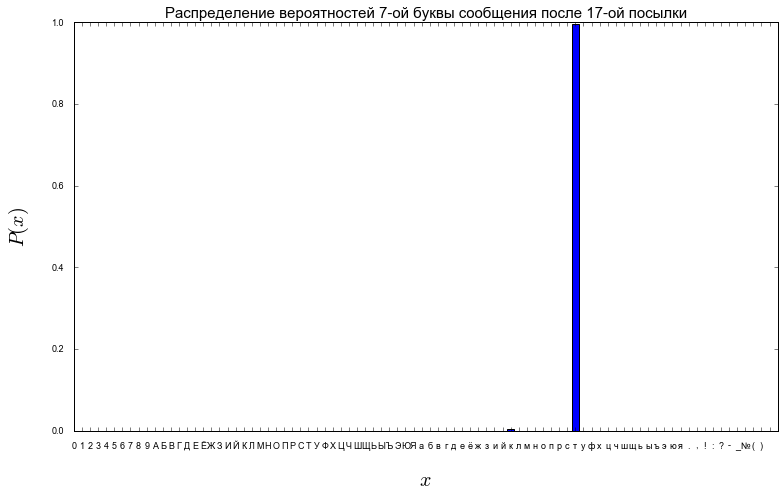

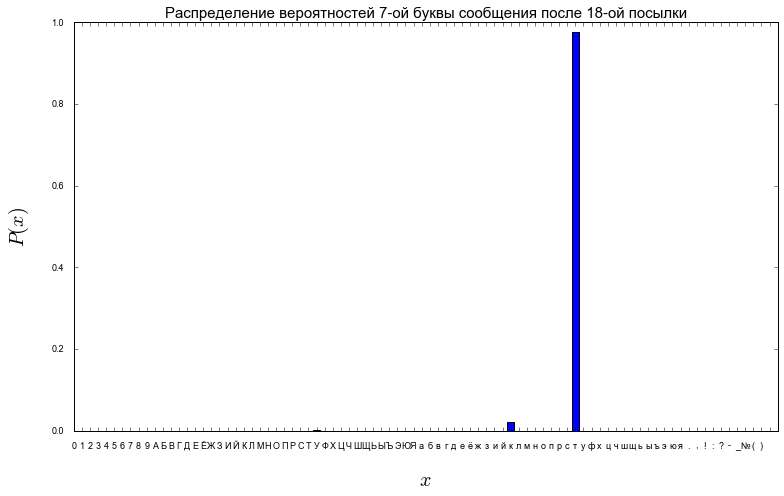

In [25]:
for i in range(m):  # для каждого сообщения
    char_num = 7
    curr = chars_weight[i][char_num]

    sorted_keys = get_sorted_keys()
    sorted_values = []
    for key in sorted_keys:
        sorted_values.append(curr[key])

    fig = plt.figure(figsize=(11, 7))
    plt.bar(range(len(alphabet)), sorted_values, align='center')
    plt.xticks(range(len(curr)), sorted_keys)
    plt.xlabel('$x$', fontsize=20, labelpad=20)
    plt.ylabel('$P(x)$', fontsize=20, labelpad=20)
    plt.tick_params(labelsize=9, pad=10)
    plt.title('Распределение вероятностей {0}-ой буквы сообщения после {1}-ой посылки'.format(char_num, i + 1), fontsize=15)
    plt.tight_layout()
    plt.xlim([0, len(curr)])
    plt.ylim([0, 1])
    plt.tight_layout()
    # plt.savefig('./pics/weight{i}.png'.format(i=i+1))
    plt.show()
    plt.close(fig)

Из результатов видно, что в ситуации, когда вероятности задаются ихсодя из частоты встречания букв в русском языке, зашумленное сообщение было распознано немного быстрее.

#### 1.2. Расчет энтропии и количества информации

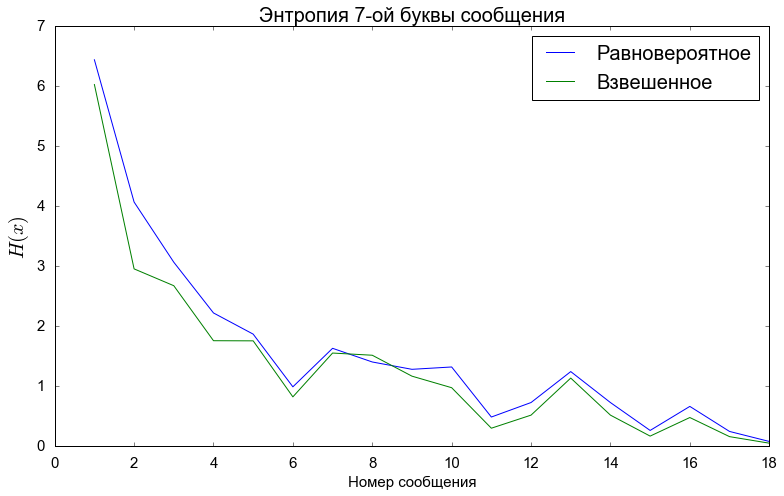

In [26]:
x = range(1, m+1)
y_u = []
y_w = []

for i in range(m):
    char_num = 7
    y_u.append(entropies[i][char_num])
    y_w.append(entropies_weight[i][char_num])
    
fig = plt.figure(figsize=(11,7))
plt.plot(x, y_u, label='Равновероятное')
plt.plot(x, y_w, label='Взвешенное')
plt.legend(fontsize=20)
plt.xlabel('Номер сообщения', fontsize=15)
plt.ylabel('$H(x)$', fontsize=20)
plt.tick_params(labelsize=15, pad=10)
plt.title('Энтропия {0}-ой буквы сообщения'.format(char_num, i + 1), fontsize=20)
plt.tight_layout()
#plt.savefig('./pics/entropy.png')
plt.show()
plt.close()

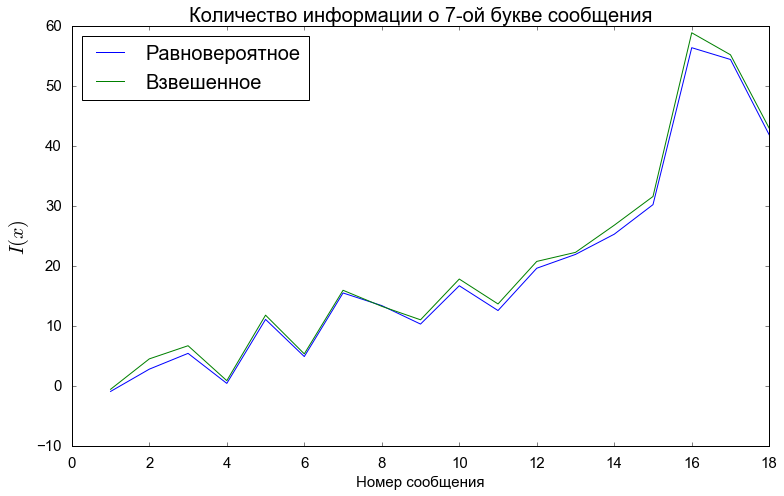

In [27]:
x = range(1, m+1)
i_u = []
i_w = []

for i in range(m):
    char_num = 7
    i_u.append(infos[i][char_num])
    i_w.append(infos_weight[i][char_num])
    
fig = plt.figure(figsize=(11,7))
plt.plot(x, i_u, label='Равновероятное')
plt.plot(x, i_w, label='Взвешенное')
plt.legend(fontsize=20, loc='upper left')
plt.xlabel('Номер сообщения', fontsize=15)
plt.ylabel('$I(x)$', fontsize=20)
plt.tick_params(labelsize=15, pad=10)
plt.title('Количество информации о {0}-ой букве сообщения'.format(char_num, i + 1), fontsize=20)
plt.tight_layout()
#plt.savefig('./pics/entropy.png')
plt.show()
plt.close()